In [52]:

import Clasificador
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Autor Luis Lago y Manuel Sanchez Montanes
# Modificada por Gonzalo
def plotModel(x,y,clase,clf,title,diccionarios):
    x_min, x_max = x.min() - .2, x.max() + .2
    y_min, y_max = y.min() - .2, y.max() + .2

    hx = (x_max - x_min)/100.
    hy = (y_max - y_min)/100.


    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy), indexing='ij')

    a = np.vstack((xx.flatten(),yy.flatten())).T
    print(a.shape)
    print(a)
    
    if isinstance(clf, Clasificador.Clasificador):
        z = clf.clasifica(a)
        print("la Z", z)
    elif hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]


    z = z.reshape(xx.shape)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #ax = plt.subplot(1, 1, 1)
    plt.contourf(xx, yy, z, cmap=cm, alpha=.8)
    plt.contour(xx, yy, z, [0.5], linewidths=[2], colors=['k'])

    if clase is not None:
        plt.scatter(x[clase==0], y[clase==0], c='#FF0000')
        plt.scatter(x[clase==1], y[clase==1], c='#0000FF')
    else:
        plt.plot(x,y,'g', linewidth=3)

    plt.gca().set_xlim(xx.min(), xx.max())
    plt.gca().set_ylim(yy.min(), yy.max())
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)


In [53]:


from Datos import Datos


from Clasificador import ClasificadorVecinosProximos


dataset = Datos("../ConjuntosDatos/example1.data")
#print(dataset.datos)
knn = ClasificadorVecinosProximos(k=5 ,normaliza=True)
knn.entrenamiento(dataset)
"""
pred = knn.clasifica(dataset)
#print(knn.est)
#print(pred != knn.datos[:,-1])


"""
plotModel(dataset[:,0],dataset[:,1],dataset[:,-1]!=0,knn,"dasasd",dataset.diccionarios)


(10100, 2)
[[-1.544603    0.348631  ]
 [-1.544603    0.38021684]
 [-1.544603    0.41180268]
 ...
 [ 5.581016    3.41245748]
 [ 5.581016    3.44404332]
 [ 5.581016    3.47562916]]
la Z [0. 0. 0. ... 0. 0. 0.]


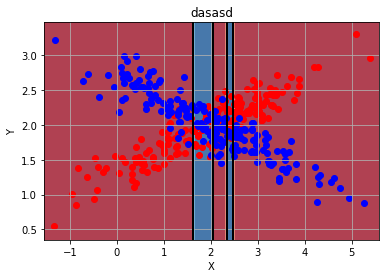

In [54]:
plt.show()

In [20]:
pred = knn.clasifica(dataset)

print(pred != knn.datos[:,-1])



Clasificador.Clasificador.error(knn.datos, pred)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

0.0